# Sampling distributions

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
da = pd.read_csv("nhanes_2015_2016.csv")

## 平均值的抽样分布

In [3]:
m = 100
sbp_diff = []

for i in range(1000):
    dx = da.sample(2 * m)
    dx1 = dx.iloc[0:m, :]
    dx2 = dx.iloc[m:, :]
    sbp_diff.append(dx1.BPXSY1.mean() - dx2.BPXSY1.mean())

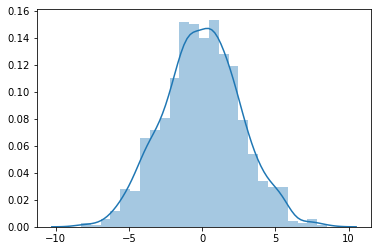

In [4]:
sns.distplot(sbp_diff)

In [5]:
pd.Series(sbp_diff).describe()

count    1000.000000
mean       -0.025431
std         2.634400
min        -8.280505
25%        -1.770804
50%         0.030802
75%         1.725560
max         8.521520
dtype: float64

count    1000.000000
mean        0.038011
std         1.338730
min        -5.106888
25%        -0.930938
50%         0.045274
75%         0.953906
max         4.449072
dtype: float64

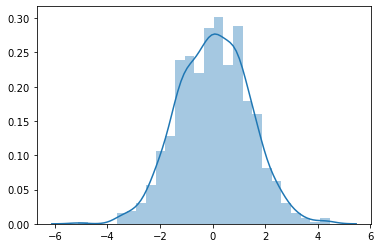

In [8]:
m = 400
sbp_diff = []

for i in range(1000):
    dx = da.sample(2 * m)
    dx1 = dx.iloc[0:m, :]
    dx2 = dx.iloc[m:, :]
    sbp_diff.append(dx1.BPXSY1.mean() - dx2.BPXSY1.mean())
    
sns.distplot(sbp_diff)
pd.Series(sbp_diff).describe()

## 相关系数的抽样分布

In [10]:
for m in 100, 400:
    sbp_diff = []
    for i in range(1000):
        dx = da.sample(2 * m)
        dx1 = dx.iloc[0:m, :]
        dx2 = dx.iloc[m:, :]
        r1 = np.corrcoef(dx1.loc[:, ["BPXSY1", "BPXDI1"]].dropna().T)
        r2 = np.corrcoef(dx2.loc[:, ["BPXSY1", "BPXDI1"]].dropna().T)
        sbp_diff.append(r1 - r2)
    print("m = %d" % m, np.std(sbp_diff), np.sqrt(2 / m))

m = 100 0.12122946317018672 0.1414213562373095
m = 400 0.06521231631727807 0.07071067811865475


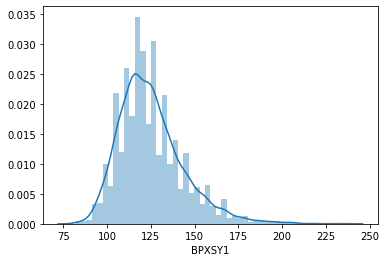

In [11]:
sns.distplot(da.BPXSY1.dropna())

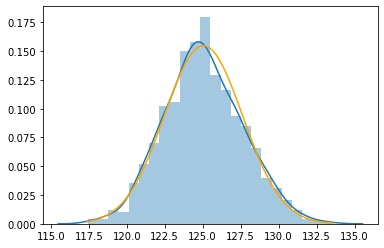

In [13]:
m = 50
sbp_mean = []

for i in range(1000):
    dx = da.sample(m)
    sbp_mean.append(dx.BPXSY1.dropna().mean())
sns.distplot(sbp_mean)

x = np.linspace(np.min(sbp_mean), np.max(sbp_mean), 100)
from scipy.stats.distributions import norm
y = norm.pdf(x, np.mean(sbp_mean), np.std(sbp_mean))
plt.plot(x, y, color='orange')